<a href="https://colab.research.google.com/github/Guzel-Gizatullina/titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Imports + data loading

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#2.Removing all missing values and categorical variables. Training the model. Choosing and calculating the quality metric.

In [7]:
#Remove missing values: drop rows or columns with missing values.
df.dropna(how='all',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Remove categorical variables
df = df.select_dtypes(exclude=['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Age          572 non-null    float64
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 38.9 KB


In [12]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [13]:
# Training a linear regression model
model = LinearRegression()

In [14]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


PassengerId      0
Pclass           0
Age            140
SibSp            0
Parch            0
Fare             0
dtype: int64
0


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

imputer = SimpleImputer(strategy='mean')  # or median, most_frequent, constant
model = make_pipeline(imputer, LinearRegression())

model.fit(X_train, y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [16]:
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [17]:
# Predict and calculate RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.4326059011065124

#3.Reloading the full data again.

In [18]:
df_2 = pd.read_csv('/content/train.csv')
df_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
#Dropping columns taht are not necessary
columns_ToDrop = [3, 8,10]
df_2.drop(df_2.columns[columns_ToDrop], axis=1, inplace=True)
df_2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


Explaining why 3 columns such as "Name", "Ticket", "Cabin" have been deleted.

When building a predictive model, especially for a task such as predicting survival on the Titanic, it's crucial to focus on features that have a direct or indirect influence on the outcome. The decision to remove the "Name," "Ticket," and "Cabin" columns can be justified based on their relevance and utility for the model:

* Justification for Removal: The "Name" of a passenger is generally unique to each individual and does not directly contribute to survival chances.
*   Justification for Removal: The "Ticket" column contains ticket numbers, which are largely arbitrary identifiers.
* Justification for Removal: The "Cabin" information could potentially be useful, as it might correlate with the passenger's location on the ship and therefore their survival chances. However, a significant portion of the "Cabin" data is missing (only 204 non-null entries out of 891), making it difficult to utilize without extensive imputation.





#5.Check the data for missing values.
a) Calculate what percentage of data will be lost if you simply delete the missing values.
b) Fill in the missing values: with the mean value; with a constant; with a class indicating that the value was missing; with a random number. Use a suitable method for different features. It is not necessary to use all the listed methods.

In [22]:
missing_values_count = df_2.isnull().sum()

In [23]:
missing_values_count

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

We will miss 177 passengers because of the age column. We can replace missing values with the average age instead.

In [24]:
# Replacing the Nan values with average age in 'Age'
average_age = df_2['Age'].mean()
df_2['Age'].fillna(round(average_age), inplace=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


#6.Convert categorical variables into numeric values. You can use pd.get_dummies or preprocessing.LabelEncoder. Try to avoid using loops for this task.

In [25]:
# Dealing with Dummy Values
df_2_dummies = pd.get_dummies(df_2[['Sex', 'Embarked']])
df_2_dummies = df_2_dummies.astype(int)
df_2_dummies

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [26]:
df_2_dummies = pd.get_dummies(df_2[['Sex', 'Embarked']], prefix='', prefix_sep='', drop_first=True)
df_2_dummies = df_2_dummies.astype(int)
df_2_dummies

,male,Q,S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [27]:
df_2_new = pd.concat([df_2, df_2_dummies], axis=1)
df_2_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1,0,1
887,888,1,1,female,19.0,0,0,30.0000,S,0,0,1
888,889,0,3,female,30.0,1,2,23.4500,S,0,0,1
889,890,1,1,male,26.0,0,0,30.0000,C,1,0,0


In [28]:
df_2_new.drop(['Sex', 'Embarked'],axis=1, inplace=True)
df_2_new

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,30.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [29]:
df_2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    int64  
 8   Q            891 non-null    int64  
 9   S            891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [30]:
df_2_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

#7.Check the data for the presence of outliers.
a) Remove the outliers if you consider it appropriate. Justify your decision.

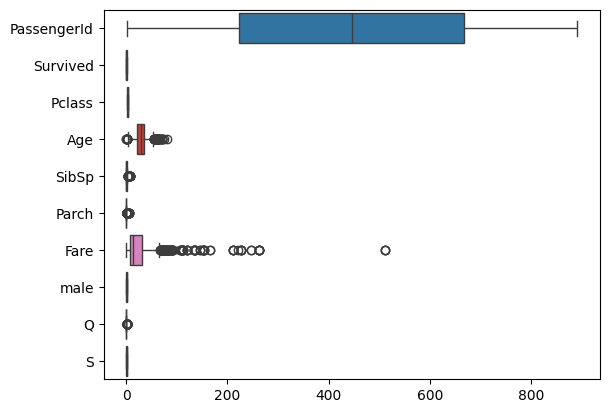

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column' is the column you want to check
sns.boxplot(data=df_2_new, orient='h')
plt.show()



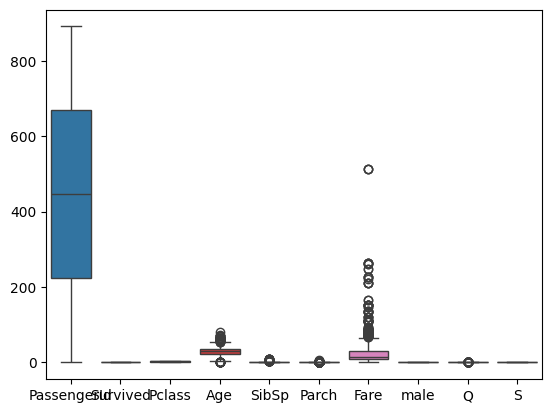

In [32]:
sns.boxplot(data=df_2_new, orient='v')
plt.show()


In [33]:
# The name of the column from which to remove outliers
target_column = 'Fare'

In [34]:
# Calculating IQR for the specified column
Q1 = df_2[target_column].quantile(0.25)
Q3 = df_2_new[target_column].quantile(0.75)
IQR = Q3 - Q1

In [35]:
# Defining boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [36]:
# Filtering outliers only in the target column
df_filtered = df_2_new[(df_2_new[target_column] >= lower_bound) & (df_2_new[target_column] <= upper_bound)]

In [37]:
print(f"Original number of points: {df_2_new.shape[0]}")
print(f"Number of points after removing outliers in'{target_column}': {df_filtered.shape[0]}")

Исходное количество точек: 891
Количество точек после удаления выбросов в 'Fare': 775


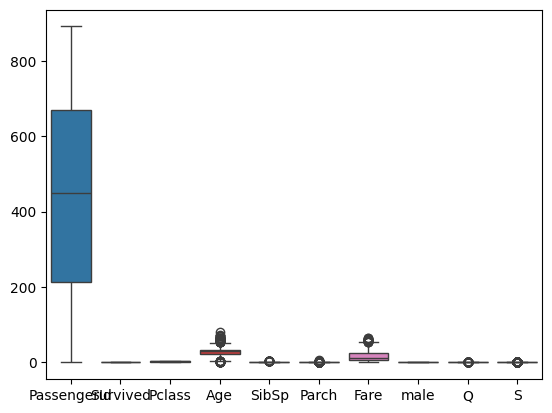

In [38]:
sns.boxplot(data=df_filtered, orient='v')
plt.show()

#8.Constructing 2 graphs. The visualization based on the data under investigation and useful (the graphs allowing conclusions to be made about the characteristics of the dataset/class/feature).

<Axes: xlabel='Survived', ylabel='count'>

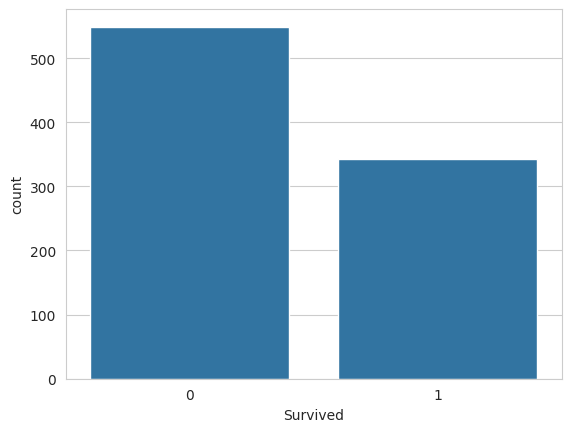

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_2)

<Axes: xlabel='Survived', ylabel='count'>

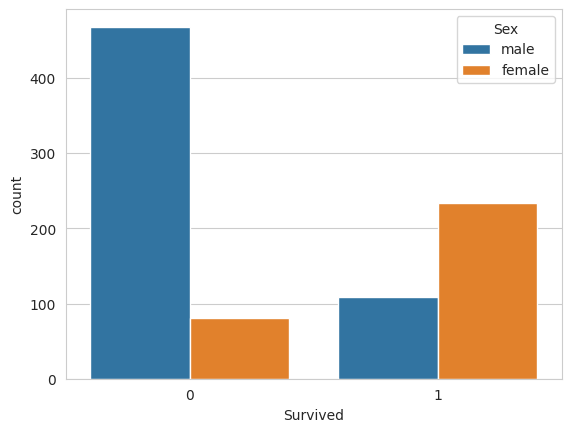

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_2)

This count plot shows:
* among all the males 470 did not survived and around 110 survived.
* Out of all female around 85 did not survive and around 235 survived out of 891.


#10.Training the same model as in section 2 on the transformed data. Calculating the same metric as in section 2.

In [43]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Age          775 non-null    float64
 4   SibSp        775 non-null    int64  
 5   Parch        775 non-null    int64  
 6   Fare         775 non-null    float64
 7   male         775 non-null    int64  
 8   Q            775 non-null    int64  
 9   S            775 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 66.6 KB


In [46]:
X_2 = df_filtered.drop(['Survived'], axis=1)
y_2 = df_filtered['Survived']
X_train_2, X_test_2, y_train_2, y_test_2= train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [48]:
model_2 = LinearRegression()

In [49]:
model_2.fit(X_train_2, y_train_2)

LinearRegression()

In [52]:
y_pred_2 = model_2.predict(X_test_2)
rmse_2 = np.sqrt(mean_squared_error(y_test_2, y_pred_2))
rmse_2

0.4185669334656849

#11.Formulating the conclusions of the work done.
a) Briefly describe what transformations were made and why.
b) Compare the metrics of the models from section 2 and section 10.
 c) Write your opinion on the advisability of working with data when building machine learning models. *Is it necessary to similarly explore and augment truly large data sets?

Data preprocessing was conducted, including transformations, removal of empty values, and exclusion of outliers.


In [53]:
models = pd.DataFrame({
    'Model': ['model', 'model_2'],'Score': [rmse, rmse_2]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,model,0.432606
1,model_2,0.418567


Based on the provided scores for two models, model and model_2, with scores of 0.432606 and 0.418567 respectively, it appears that model performs slightly better than model_2.

Working with data is essential in building machine learning models to ensure their accuracy, robustness, and fairness. Preprocessing, such as cleaning and feature engineering, improves model performance. For large datasets, efficient management and exploration are crucial, leveraging automated tools and big data technologies. In short, thorough data preparation is fundamental, regardless of dataset size, for developing effective machine learning solutions.